In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=43727e9c4bf24595d9c513a728671598ac19a4cc4566080bd08e103f0951cc7e
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [2]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [3]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Proj1").getOrCreate()

df=pd.read_csv("housing.csv")
df['bed_rooms_per_room'] = df['total_bedrooms']/df['total_rooms']
attribute = ['median_house_value','median_income','total_rooms','housing_median_age','total_bedrooms','bed_rooms_per_room']





In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
bed_rooms_per_room    float64
dtype: object

In [5]:
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bed_rooms_per_room    207
dtype: int64

In [6]:
print("Total num of rows" , len(df))


Total num of rows 20640


In [7]:
#dropna is for droping null values
df = df.dropna()
print("No of rows after eliminating null values " , len(df))

No of rows after eliminating null values  20433


In [8]:
df['ocean_proximity'].value_counts()


<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

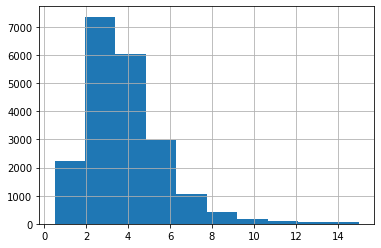

In [9]:
df['median_income'].hist()


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'bed_rooms_per_room'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

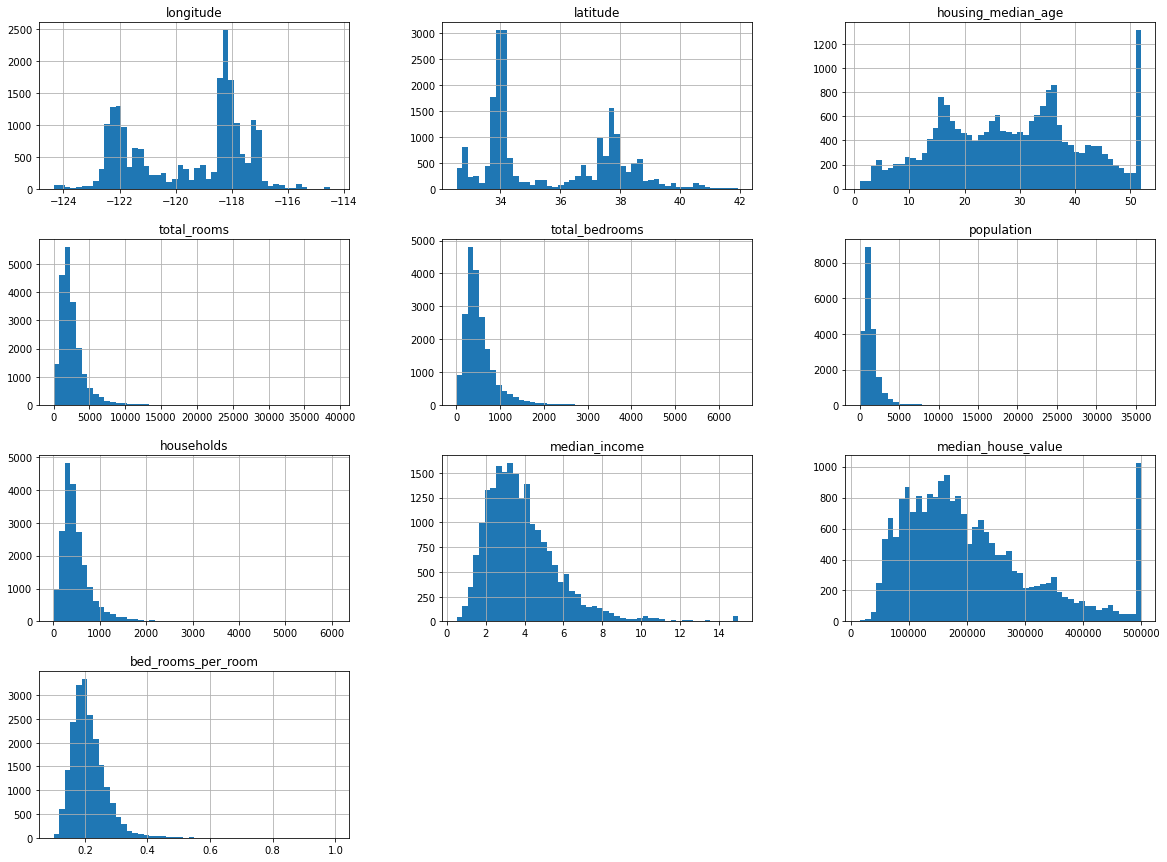

In [10]:
df.hist(bins=50, figsize=(20,15))


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

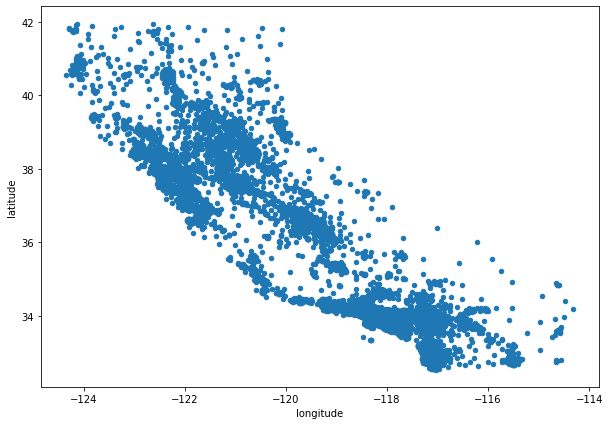

In [11]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7))


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

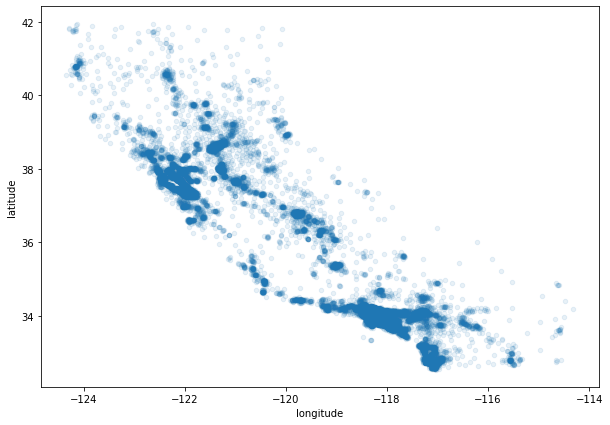

In [12]:
df.plot(kind='scatter', x='longitude', alpha=0.1, y='latitude', figsize=(10,7))


In [13]:
df['bed_rooms_per_room'] = df['total_bedrooms']/df['total_rooms']


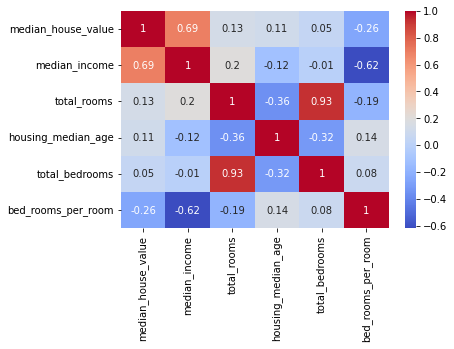

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


corrMatriz = df[attribute].corr().round(2)
sns.heatmap(corrMatriz, annot = True, cmap='coolwarm')
plt.show()

In [15]:
df.isnull().sum() 


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
bed_rooms_per_room    0
dtype: int64

In [16]:
ds2 = spark.createDataFrame(df)

In [17]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.sql.functions import col

indexer = StringIndexer(inputCol = "ocean_proximity", outputCol = "ocean_proximity_index")
ds2= indexer.fit(ds2).transform(ds2)




In [18]:
f1=ds2.columns[:8]+ds2.columns[10:]
f1

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bed_rooms_per_room',
 'ocean_proximity_index']

In [19]:
vector_assembler=VectorAssembler(inputCols=f1,outputCol="features")
va=vector_assembler.transform(ds2).select("features","median_house_value")
va.show()

+--------------------+------------------+
|            features|median_house_value|
+--------------------+------------------+
|[-122.23,37.88,41...|          452600.0|
|[-122.22,37.86,21...|          358500.0|
|[-122.24,37.85,52...|          352100.0|
|[-122.25,37.85,52...|          341300.0|
|[-122.25,37.85,52...|          342200.0|
|[-122.25,37.85,52...|          269700.0|
|[-122.25,37.84,52...|          299200.0|
|[-122.25,37.84,52...|          241400.0|
|[-122.26,37.84,42...|          226700.0|
|[-122.25,37.84,52...|          261100.0|
|[-122.26,37.85,52...|          281500.0|
|[-122.26,37.85,52...|          241800.0|
|[-122.26,37.85,52...|          213500.0|
|[-122.26,37.84,52...|          191300.0|
|[-122.26,37.85,52...|          159200.0|
|[-122.26,37.85,50...|          140000.0|
|[-122.27,37.85,52...|          152500.0|
|[-122.27,37.85,52...|          155500.0|
|[-122.26,37.84,50...|          158700.0|
|[-122.27,37.84,52...|          162900.0|
+--------------------+------------

In [20]:
train_data, test_data = va.randomSplit([0.8, 0.2])

In [21]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="median_house_value")

In [22]:
model=lr.fit(train_data) 

In [23]:
pred1=model.evaluate(test_data)

In [24]:
pred1.predictions.show()

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[-124.3,41.8,19.0...|           85800.0| 62783.27508472698|
|[-124.3,41.84,17....|          103600.0|101780.53957802476|
|[-124.23,41.75,11...|           73200.0| 74690.34494831413|
|[-124.22,41.73,28...|           78300.0| 77129.69477232918|
|[-124.19,40.73,21...|           90100.0|164031.01191091863|
|[-124.19,41.78,15...|           74600.0| 52159.88292734092|
|[-124.18,40.62,35...|          107000.0|154943.69028938422|
|[-124.18,40.79,39...|           70500.0|102069.16134884162|
|[-124.17,40.78,39...|           68300.0|104688.20010634651|
|[-124.16,40.79,52...|           76900.0|127622.36795430072|
|[-124.16,40.8,52....|           74700.0| 131168.5850378261|
|[-124.15,40.78,36...|           90000.0|170813.75267324038|
|[-124.15,40.79,37...|           86400.0|153491.53405078175|
|[-124.14,40.59,22...|  

In [25]:
from pyspark.sql.functions import col

from pyspark.ml.evaluation import RegressionEvaluator

In [26]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="median_house_value", metricName="rmse")
r2 = evaluator.evaluate(pred1.predictions, {evaluator.metricName:"r2"})
print("r2 = %.3f" % r2)

r2 = 0.630


Random Forest Regressor


In [27]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler

In [28]:

rf = RandomForestRegressor(
    numTrees=10, 
    maxDepth=5, 
    featuresCol="features", 
    labelCol="median_house_value", 
    predictionCol="prediction"
)

In [29]:
model = rf.fit(train_data)

In [30]:
predictions = model.transform(test_data)
predictions.show(50)

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[-124.3,41.8,19.0...|           85800.0|142197.59741727257|
|[-124.3,41.84,17....|          103600.0|162502.07222264717|
|[-124.23,41.75,11...|           73200.0|156685.78769920947|
|[-124.22,41.73,28...|           78300.0|  155189.735654363|
|[-124.19,40.73,21...|           90100.0|186833.25707891973|
|[-124.19,41.78,15...|           74600.0|156685.78769920947|
|[-124.18,40.62,35...|          107000.0|169281.61686398735|
|[-124.18,40.79,39...|           70500.0| 139000.6921565571|
|[-124.17,40.78,39...|           68300.0| 139000.6921565571|
|[-124.16,40.79,52...|           76900.0|168750.90517975314|
|[-124.16,40.8,52....|           74700.0|  181072.276892328|
|[-124.15,40.78,36...|           90000.0|185132.40386305074|
|[-124.15,40.79,37...|           86400.0| 162520.5015092554|
|[-124.14,40.59,22...|  

In [31]:
evaluator = RegressionEvaluator(
    labelCol="median_house_value", 
    predictionCol="prediction", 
    metricName="r2"
)
r2_score = evaluator.evaluate(predictions)
print("R2 on test data = %g" % r2_score)

R2 on test data = 0.616755


In [32]:
from pyspark.sql.functions import abs
mape = predictions.select(abs((predictions.median_house_value - predictions.prediction) / predictions.median_house_value)).agg({"abs(((median_house_value - prediction) / median_house_value))": "avg"}).collect()[0][0]

# Print the MAPE
print("MAPE = ", mape)

MAPE =  0.287952183132632


Gradient Boosting Regression


In [33]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [34]:
gbt = GBTRegressor(
    maxIter=10, 
    maxDepth=5, 
    featuresCol="features", 
    labelCol="median_house_value", 
    predictionCol="predictionGB"
)

In [35]:
model = gbt.fit(train_data)

In [36]:
predictions4 = model.transform(test_data)
predictions4.show(20)

+--------------------+------------------+------------------+
|            features|median_house_value|      predictionGB|
+--------------------+------------------+------------------+
|[-124.3,41.8,19.0...|           85800.0| 93771.27125503017|
|[-124.3,41.84,17....|          103600.0|133762.51816635314|
|[-124.23,41.75,11...|           73200.0|122625.60279998739|
|[-124.22,41.73,28...|           78300.0|105964.61542299735|
|[-124.19,40.73,21...|           90100.0|142549.68234055428|
|[-124.19,41.78,15...|           74600.0|101486.36154712058|
|[-124.18,40.62,35...|          107000.0|144506.86813428844|
|[-124.18,40.79,39...|           70500.0| 92653.01938865574|
|[-124.17,40.78,39...|           68300.0| 87999.32312070907|
|[-124.16,40.79,52...|           76900.0| 92206.05277110172|
|[-124.16,40.8,52....|           74700.0| 95930.20915621392|
|[-124.15,40.78,36...|           90000.0|129798.72931525143|
|[-124.15,40.79,37...|           86400.0| 132788.3874076077|
|[-124.14,40.59,22...|  

In [37]:
evaluator = RegressionEvaluator(
    labelCol="median_house_value", 
    predictionCol="predictionGB", 
    metricName="r2"
)
r2_score = evaluator.evaluate(predictions4)
print("R2 on test data = %g" % r2_score)

R2 on test data = 0.70596


In [38]:
from pyspark.sql.functions import abs
mape = predictions4.select(abs((predictions4.median_house_value - predictions4.predictionGB) / predictions4.median_house_value)).agg({"abs(((median_house_value - predictionGB) / median_house_value))": "avg"}).collect()[0][0]

# Print the MAPE
print("MAPE = ", mape)

MAPE =  0.23982595796281458


Polynomial Regression


In [39]:
from pyspark.ml.feature import PolynomialExpansion
polyExpansion = PolynomialExpansion(degree=2, inputCol="features", outputCol="polyFeatures")
data = polyExpansion.transform(va)

In [40]:
train_data, test_data = data.randomSplit([0.8, 0.2])

In [41]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="median_house_value")

In [42]:
model=lr.fit(train_data) 

In [43]:
pred3=model.evaluate(test_data)

In [44]:
pred3.predictions.show(50)

+--------------------+------------------+--------------------+-------------------+
|            features|median_house_value|        polyFeatures|         prediction|
+--------------------+------------------+--------------------+-------------------+
|[-124.3,41.84,17....|          103600.0|[-124.3,15450.49,...| 101540.35299298493|
|[-124.27,40.69,36...|           79000.0|[-124.27,15443.03...| 155382.63272826467|
|[-124.23,40.81,52...|           50800.0|[-124.23,15433.09...| 181932.70598990098|
|[-124.22,41.73,28...|           78300.0|[-124.22,15430.60...|  77370.91083322279|
|[-124.19,40.73,21...|           90100.0|[-124.19,15423.15...| 164406.07275736006|
|[-124.17,40.8,52....|           60000.0|[-124.17,15418.18...| 169412.64087951044|
|[-124.16,40.6,39....|           85100.0|[-124.16,15415.70...| 148470.56545804674|
|[-124.16,40.77,35...|           85600.0|[-124.16,15415.70...| 153832.69375500223|
|[-124.16,40.78,43...|           82000.0|[-124.16,15415.70...| 166615.37842573505|
|[-1

In [45]:
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="median_house_value", metricName="rmse")
r2 = evaluator.evaluate(pred3.predictions, {evaluator.metricName:"r2"})
print("r2 = %.3f" % r2)

r2 = 0.645


Decison Tree

In [46]:
from pyspark.ml.regression import DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor(featuresCol="features", labelCol="median_house_value")
model = dt.fit(train_data)

In [48]:
pred5 = model.transform(test_data)

In [49]:
pred5.show()

+--------------------+------------------+--------------------+------------------+
|            features|median_house_value|        polyFeatures|        prediction|
+--------------------+------------------+--------------------+------------------+
|[-124.3,41.84,17....|          103600.0|[-124.3,15450.49,...|185027.38095238095|
|[-124.27,40.69,36...|           79000.0|[-124.27,15443.03...|120742.06008583691|
|[-124.23,40.81,52...|           50800.0|[-124.23,15433.09...|185027.38095238095|
|[-124.22,41.73,28...|           78300.0|[-124.22,15430.60...|120742.06008583691|
|[-124.19,40.73,21...|           90100.0|[-124.19,15423.15...|185027.38095238095|
|[-124.17,40.8,52....|           60000.0|[-124.17,15418.18...|120742.06008583691|
|[-124.16,40.6,39....|           85100.0|[-124.16,15415.70...|120742.06008583691|
|[-124.16,40.77,35...|           85600.0|[-124.16,15415.70...|120742.06008583691|
|[-124.16,40.78,43...|           82000.0|[-124.16,15415.70...|120742.06008583691|
|[-124.16,40.79,

In [50]:
evaluator = RegressionEvaluator(
    labelCol="median_house_value", 
    predictionCol="prediction", 
    metricName="r2"
)
r2_score = evaluator.evaluate(pred5)
print("R2 on test data = %g" % r2_score)

R2 on test data = 0.624338


In [55]:
from flask import Flask, jsonify, request

In [54]:
pc.dump(lr,open('model.pkl','wb'))

TypeError: ignored